In [1]:
import import_ipynb
import importlib
from importlib import reload

In [2]:
import util
import process
import numpy as np
import cupy as cp
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'util'

In [3]:
from process import get_labels, get_train_test_data, get_data, get_binary_data

In [1]:
from util import sigmoid, bin_cross_entropy, error_rate, relu, init_weight_bias, classification_rate, to_indicator, bin_cross_entropy_mean, softmax, cost_mean

ModuleNotFoundError: No module named 'util'

In [10]:
reload(util)
# reload(process)

importing Jupyter notebook from util.ipynb


<module 'util' from 'util.ipynb'>

In [9]:
class ANN(object):
    def __init__(self, M) :  #no of hidden units
        self.M = M
        
    def fit(self, X, Y, learning_rate= 5*10e-7, reg = 1.0, epochs = 10000, show_fig = False, usecupy = False, activation = 'relu') :
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        if usecupy :
            module = importlib.import_module('cupy')
            X, Y = module.array(X), module.array(Y)
            Xvalid, Yvalid = module.array(Xvalid), module.array(Yvalid)
        else :
            module = importlib.import_module('numpy')
       
            
        self.W1, self.b1 = module.random.randn(D, self.M)/ module.sqrt(D), module.zeros(self.M)
        self.W2, self.b2 = module.random.randn(self.M) / module.sqrt(self.M), 0
        
        costs_valid = []
        costs = []
        best_val_error = None
        for i in range(epochs) :
            #forward propogation
            pY, Z = self.forward(X, activation, usecupy = usecupy)
            c = bin_cross_entropy_mean(Y, pY, usecupy = usecupy)
            if usecupy:
                c = c.get()
            costs.append(c)
            
            # gradient descent step
            pY_Y = pY - Y
            self.W2 -= learning_rate*(Z.T.dot(pY_Y) + reg*self.W2)
            self.b2 -= learning_rate*((pY_Y).sum() + reg*self.b2)

            if activation == 'relu' :
                dZ = module.outer(pY_Y, self.W2) * (Z>0)
            elif activation == 'tanh' :
                dZ = module.outer(pY_Y, self.W2) * (1 - Z * Z)
            self.W1 -= learning_rate*(X.T.dot(dZ) + reg*self.W1)
            self.b1 -= learning_rate*(module.sum(dZ, axis=0) + reg*self.b1)
                       
            pYvalid, _ = self.forward(Xvalid, activation, usecupy = usecupy)
            c_valid = bin_cross_entropy_mean(Yvalid, pYvalid, usecupy = usecupy)
            if usecupy:
                c_valid = c_valid.get()
                e = error_rate(Yvalid.get(), np.round(pYvalid.get()))
            else :
                e = error_rate(Yvalid, np.round(pYvalid))
            costs_valid.append(c_valid)
            
            
            if best_val_error == None or e < best_val_error:
                best_val_error = e
                
            if i % 20 == 0 :
                print(f'i = {i}, cost = {c}, cost_valid = {c_valid}, error = {e}')
        print('Best val error', best_val_error)

        if show_fig == True :
            plt.figure()
            plt.title('Costs')
            plt.plot(costs, label = 'Training costs')
            plt.plot(costs_valid, label = 'Validation costs')
            plt.legend()
            plt.show()
                
    def forward(self, X, activation = 'relu', usecupy = False) :
        if usecupy :
            module = importlib.import_module('cupy')
        else :
            module = importlib.import_module('numpy')
        alpha = X.dot(self.W1) + self.b1
            
        if activation == 'relu' :
            Z = relu(alpha)
        elif activation == 'tanh' :
            Z = module.tanh(alpha)
        return sigmoid(Z.dot(self.W2) + self.b2), Z
    
    def predict(self, X, activation) :
        pY , _ = self.forward(X, activation)
        return np.round(pY)
    
    def score(self, X, Y) :
        if str(type(X)) == "<class 'cupy.ndarray'>" :
            X = X.get()
        if str(type(Y)) == "<class 'cupy.ndarray'>" :
            Y = Y.get()
        prediction = self.predict(X)
        return classification_rate(Y, prediction)
    
    def save(name) :
        np.savez(name, self.W2, self.W1, self.b2, self.b1)
        
    def load(name) :
        return np.load(name)

In [7]:
X, Y = get_binary_data(True)

i = 0, cost = 0.7087185753939256, cost_valid = 0.693926341676685, error = 0.498
i = 20, cost = 0.6779376437947243, cost_valid = 0.6741200053810434, error = 0.397
i = 40, cost = 0.6715066499223997, cost_valid = 0.6683087679337434, error = 0.383
i = 60, cost = 0.6659642850362651, cost_valid = 0.6631243503003754, error = 0.385
i = 80, cost = 0.6611082290426176, cost_valid = 0.6586033154025349, error = 0.372
i = 100, cost = 0.6567827410269783, cost_valid = 0.6545990938950963, error = 0.382
i = 120, cost = 0.6528046013659391, cost_valid = 0.6511114566883507, error = 0.37
i = 140, cost = 0.6492333915706566, cost_valid = 0.6479776629606574, error = 0.373
i = 160, cost = 0.6458093219474875, cost_valid = 0.6450993313839222, error = 0.363
i = 180, cost = 0.6426470492440364, cost_valid = 0.6424614784375535, error = 0.361
i = 200, cost = 0.6397082780358423, cost_valid = 0.6400296657338669, error = 0.357
i = 220, cost = 0.6369017141565463, cost_valid = 0.6376153873009738, error = 0.357
i = 240, cos

i = 1980, cost = 0.5010687714055158, cost_valid = 0.5244903373270684, error = 0.278
i = 2000, cost = 0.49975719929720314, cost_valid = 0.5233737073866103, error = 0.276
i = 2020, cost = 0.4980777170221222, cost_valid = 0.5223500280591062, error = 0.272
i = 2040, cost = 0.49677752693641886, cost_valid = 0.5211264658521816, error = 0.269
i = 2060, cost = 0.49599036644302325, cost_valid = 0.5199121078066312, error = 0.269
i = 2080, cost = 0.49464095811841574, cost_valid = 0.5187903804054215, error = 0.269
i = 2100, cost = 0.49345636051165204, cost_valid = 0.5176758426454876, error = 0.269
i = 2120, cost = 0.49245332242614237, cost_valid = 0.5166132396450359, error = 0.27
i = 2140, cost = 0.4906247640047111, cost_valid = 0.5153991811494335, error = 0.268
i = 2160, cost = 0.48901392914163216, cost_valid = 0.5143006758753975, error = 0.265
i = 2180, cost = 0.4884999952715201, cost_valid = 0.513155237079792, error = 0.27
i = 2200, cost = 0.4887579088718729, cost_valid = 0.5127404864705296, er

i = 3940, cost = 0.420650550348143, cost_valid = 0.462299679652838, error = 0.217
i = 3960, cost = 0.41950708861717095, cost_valid = 0.4611707134615922, error = 0.216
i = 3980, cost = 0.41800195866712747, cost_valid = 0.4595489777539263, error = 0.217
i = 4000, cost = 0.41750204533415813, cost_valid = 0.4593158615391919, error = 0.215
i = 4020, cost = 0.41624232154188495, cost_valid = 0.45816990799213647, error = 0.216
i = 4040, cost = 0.41575165962855637, cost_valid = 0.45782948696516085, error = 0.212
i = 4060, cost = 0.41428117730169944, cost_valid = 0.4569190551567625, error = 0.212
i = 4080, cost = 0.4137253184838181, cost_valid = 0.4564834055762573, error = 0.212
i = 4100, cost = 0.4129318552790626, cost_valid = 0.45621014655236863, error = 0.212
i = 4120, cost = 0.41217332295341713, cost_valid = 0.4555065779380315, error = 0.21
i = 4140, cost = 0.41029038056051076, cost_valid = 0.45351739781836536, error = 0.208
i = 4160, cost = 0.40979254589727937, cost_valid = 0.45324925064829

i = 5880, cost = 0.33932006221494126, cost_valid = 0.39743951358293556, error = 0.157
i = 5900, cost = 0.3384026164680394, cost_valid = 0.39674288356842013, error = 0.158
i = 5920, cost = 0.3383659559604978, cost_valid = 0.3966685319678387, error = 0.159
i = 5940, cost = 0.3373773711240966, cost_valid = 0.3964185959030524, error = 0.158
i = 5960, cost = 0.3358818093048236, cost_valid = 0.394154549256403, error = 0.157
i = 5980, cost = 0.336916509953916, cost_valid = 0.39673118989216666, error = 0.159
i = 6000, cost = 0.3347112910564177, cost_valid = 0.3920498931678742, error = 0.157
i = 6020, cost = 0.33480794037743394, cost_valid = 0.3948268162953024, error = 0.158
i = 6040, cost = 0.3342348935343523, cost_valid = 0.39332377369577354, error = 0.156
i = 6060, cost = 0.3325717153621705, cost_valid = 0.39259022245282954, error = 0.155
i = 6080, cost = 0.33268597451036175, cost_valid = 0.39228245353734537, error = 0.155
i = 6100, cost = 0.33146129825589704, cost_valid = 0.3903654142578945

i = 7820, cost = 0.2746243711427579, cost_valid = 0.34468921291609833, error = 0.132
i = 7840, cost = 0.27277298387691007, cost_valid = 0.34093212513636295, error = 0.13
i = 7860, cost = 0.27211300252146525, cost_valid = 0.34181329194898796, error = 0.131
i = 7880, cost = 0.2729143298017487, cost_valid = 0.3433427757796418, error = 0.131
i = 7900, cost = 0.2714718442052325, cost_valid = 0.34044692640283597, error = 0.13
i = 7920, cost = 0.27024179056563064, cost_valid = 0.3379827716073151, error = 0.128
i = 7940, cost = 0.2692201299185376, cost_valid = 0.33619331907194533, error = 0.128
i = 7960, cost = 0.2689044126802441, cost_valid = 0.33921204948001216, error = 0.13
i = 7980, cost = 0.2697001323760911, cost_valid = 0.3413907305661892, error = 0.131
i = 8000, cost = 0.26897193946613135, cost_valid = 0.33865842928702977, error = 0.13
i = 8020, cost = 0.2659561258624456, cost_valid = 0.3341681088566535, error = 0.128
i = 8040, cost = 0.26656443649676137, cost_valid = 0.3379932302465709

i = 9760, cost = 0.2168046960003431, cost_valid = 0.2939651464031188, error = 0.114
i = 9780, cost = 0.2182557464920113, cost_valid = 0.29529340760048994, error = 0.116
i = 9800, cost = 0.21770616261606515, cost_valid = 0.29396120505540146, error = 0.115
i = 9820, cost = 0.21799453213033462, cost_valid = 0.29516287737647684, error = 0.116
i = 9840, cost = 0.21732094135600402, cost_valid = 0.2926423037785003, error = 0.114
i = 9860, cost = 0.21483890180977624, cost_valid = 0.2872896036212978, error = 0.109
i = 9880, cost = 0.21216975995594725, cost_valid = 0.2841443082473789, error = 0.107
i = 9900, cost = 0.2113500452567775, cost_valid = 0.2841956597961, error = 0.109
i = 9920, cost = 0.2108646709049856, cost_valid = 0.2851771106402001, error = 0.109
i = 9940, cost = 0.21240748748353713, cost_valid = 0.29087883586479746, error = 0.112
i = 9960, cost = 0.21337160585089088, cost_valid = 0.29228349788823305, error = 0.115
i = 9980, cost = 0.2139342687871391, cost_valid = 0.292513957946388

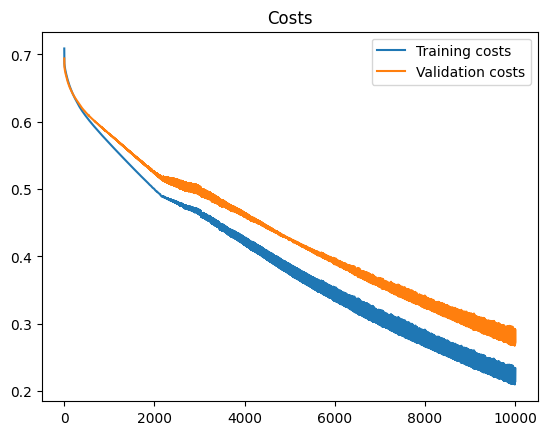

In [8]:
model = ANN(100)
model.fit(X, Y, show_fig=True, usecupy=True, epochs = 10000, learning_rate = 1e-6, activation='relu', reg = 1.0)